In [3]:
!pip install shioaji
import numpy as np
import pandas as pd
import requests
import shioaji as sj
import matplotlib.pyplot as plt

# 建立API物件，simulation=True是代表測試帳號
api = sj.Shioaji(simulation=True)

#登入你的key
# accounts = api.login("your api key","your secret key")


#要下單的話要匯入憑證
# api.activate_ca(
#     ca_path="/c/your/ca/path/Sinopac.pfx",
#     ca_passwd="YOUR_CA_PASSWORD",
#     person_id="Person of this Ca",
# )

Response Code: 0 | Event Code: 0 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total connection attempt 1 of 1) | Event: Session up


In [14]:
# k棒的api使用方式
kbars = api.kbars(
    contract=api.Contracts.Stocks["2449"], 
    start="2023-01-01", 
    end="2024-03-21", 
)
df = pd.DataFrame({**kbars})
df.ts = pd.to_datetime(df.ts)
df.set_index('ts',inplace=True)


# 週k最後一天13:30的K棒 , dropna清除NaN的值
weekly_df=df.resample('W').last().dropna()


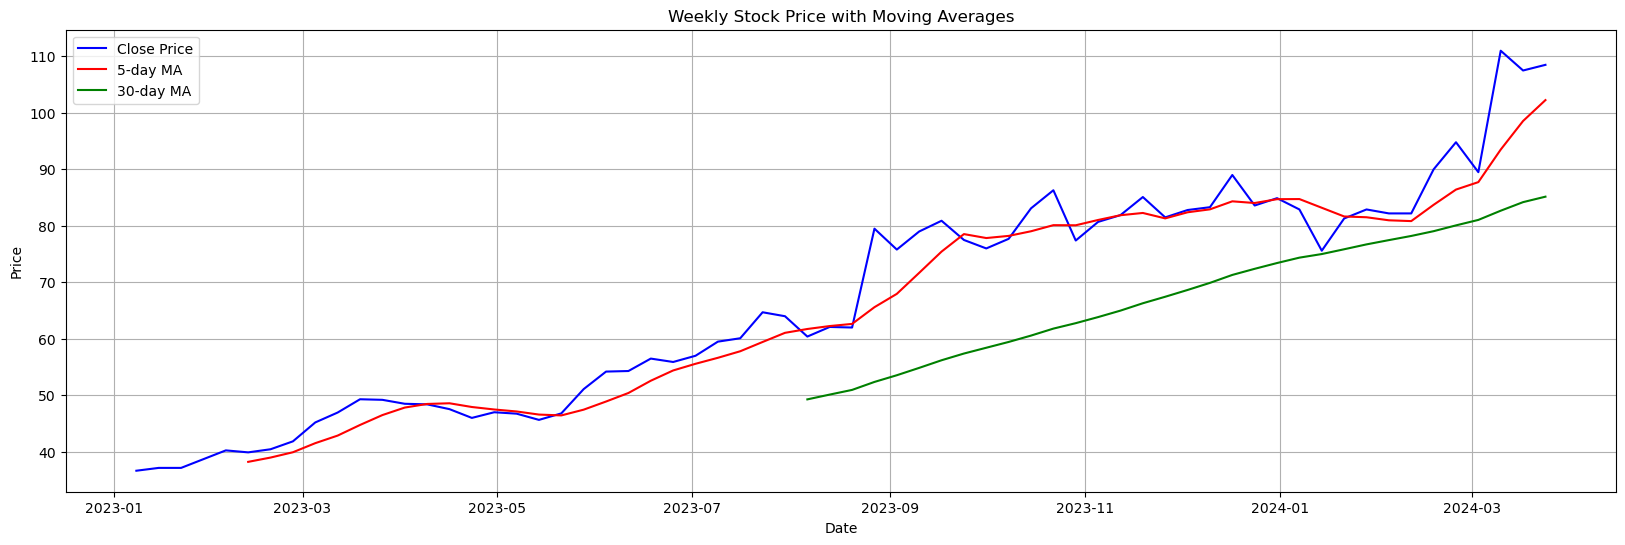

In [16]:
# 計算5日均線和30日均線
weekly_df['5MA'] = weekly_df['Close'].rolling(window=5).mean()
weekly_df['30MA'] = weekly_df['Close'].rolling(window=30).mean()

# 繪製收盤價、5日均線和30日均線
plt.figure(figsize=(20, 6))
plt.plot(weekly_df.index, weekly_df['Close'], label='Close Price', color='blue')
plt.plot(weekly_df.index, weekly_df['5MA'], label='5-day MA', color='red')
plt.plot(weekly_df.index, weekly_df['30MA'], label='30-day MA', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Weekly Stock Price with Moving Averages')
plt.legend()
plt.grid(True)
plt.show()